# Примеры и упражнения по Python3 - уровень с графикой

Автор-составитель - Михаил Колодин

Версия 2021-04-21 от 2021-05-22 - 3.2

Разделы:
* Библиотека PIL
    * [Случайное искусство](#randart)
    * [Тетрадки](#copybooks)
    * [Неквадратные плоскости](#nonsquare)

---
**Случайное искусство** <a name=randart>

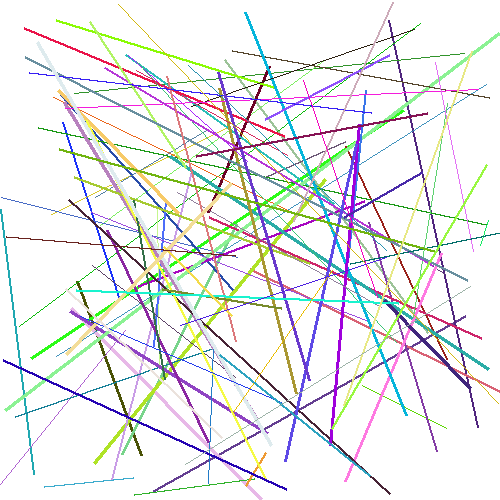

In [14]:
from PIL import Image, ImageDraw
import random
ri = random.randint

SIZE = 500
WHITE = 255, 255, 255
BLACK = 0, 0, 0
COUNT = 100

im = Image.new('RGB', (SIZE, SIZE), WHITE)
draw = ImageDraw.Draw(im)
 
for i in range(COUNT):
    p1x = ri(0, SIZE)
    p1y = ri(0, SIZE)
    p2x = ri(0, SIZE)
    p2y = ri(0, SIZE)
    rcolor = ri(0, 255), ri(0, 255), ri(0, 255)
    rwidth = ri(1, 3)
    draw.line((p1x, p1y, p2x, p2y), fill=rcolor, width=rwidth)
 
#im.show()
im.save('pil-cp01.jpg', quality=95)
im

**Тетрадки** <a name=randart>

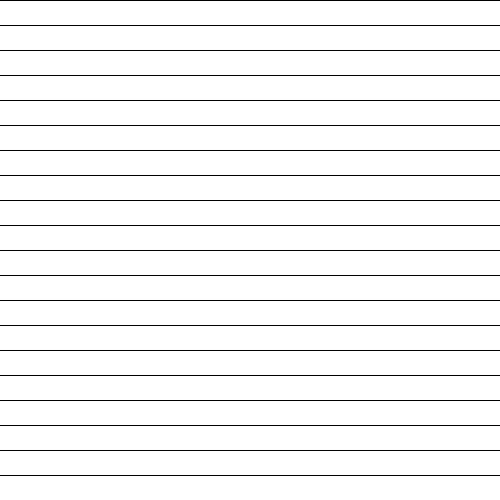

In [21]:
im = Image.new('RGB', (SIZE, SIZE), WHITE)
draw = ImageDraw.Draw(im)
 
for i in range(0, SIZE, SIZE//20):
    draw.line((0, i, SIZE, i), fill=BLACK, width=1)
 
#im.show()
im.save('pil-cp02.jpg', quality=95)
im

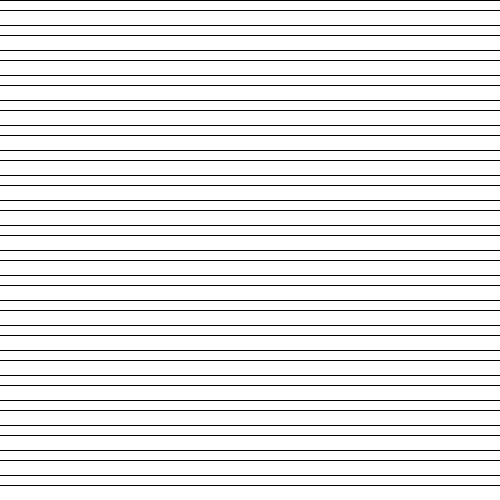

In [22]:
im = Image.new('RGB', (SIZE, SIZE), WHITE)
draw = ImageDraw.Draw(im)
 
for i in range(0, SIZE, SIZE//20):
    draw.line((0, i, SIZE, i), fill=BLACK, width=1)
    draw.line((0, i+10, SIZE, i+10), fill=BLACK, width=1)
 
#im.show()
im.save('pil-cp03.jpg', quality=95)
im

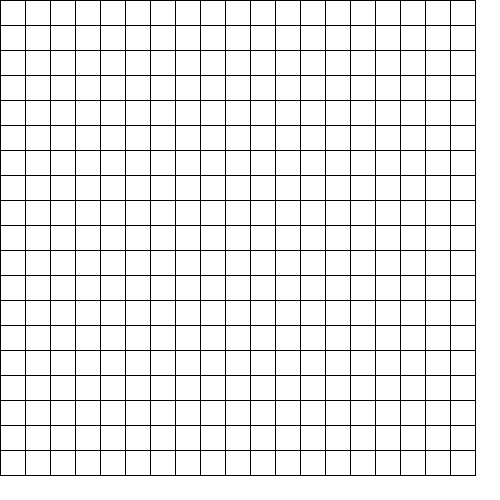

In [40]:
im = Image.new('RGB', (SIZE, SIZE), WHITE)
draw = ImageDraw.Draw(im)

STEPS = 20
BDR = (SIZE-1) // STEPS * STEPS -5
LMT = BDR
for i in range(0, SIZE, SIZE // STEPS):
    draw.line((0, i, LMT, i), fill=BLACK, width=1)
    draw.line((i, 0, i, LMT), fill=BLACK, width=1)
 
#im.show()
im.save('pil-cp04.jpg', quality=95)
im

---
**Неквадратные плоскости** <a name=nonsquare></a>

***Примитивные треугольники (не правильные)***

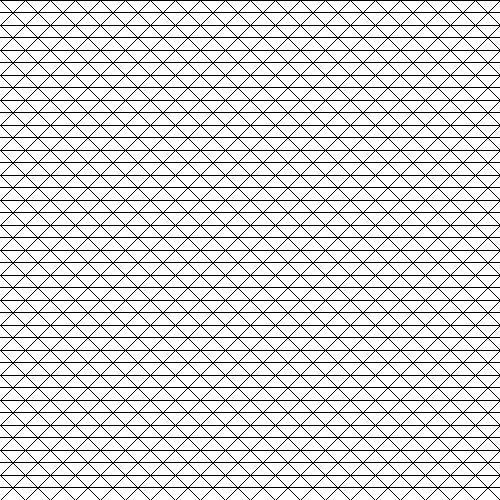

In [46]:
im = Image.new('RGB', (SIZE, SIZE), WHITE)
draw = ImageDraw.Draw(im)

STEPS = 20
for i in range(0, SIZE, SIZE // STEPS):
    draw.line((0, i, i, 0), fill=BLACK, width=1)
    draw.line((i, SIZE, SIZE, i), fill=BLACK, width=1)

    draw.line((0, i, SIZE-i, SIZE), fill=BLACK, width=1)
    draw.line((i, 0, SIZE, SIZE-i), fill=BLACK, width=1)

    draw.line((0, i, SIZE, i), fill=BLACK, width=1)
    draw.line((0, i//2, SIZE, i//2), fill=BLACK, width=1)
    draw.line((0, SIZE//2 + i//2, SIZE, SIZE//2 + i//2), fill=BLACK, width=1)

#im.show()
im.save('pil-cp05.jpg', quality=95)
im

---
***Правильные треугольники***

In [35]:
# init all
from PIL import Image, ImageDraw
from math import sin, cos, pi
import copy

SIZE = 500
WHITE = 255, 255, 255
BLACK = 0, 0, 0

grad = pi / 180.
#eps = 1 / 64
rdig = 3  # round to rdig digits after decimal point
LIM = 10.

# 1st triangle (tri)
ax = ay = 0.
bx = 1.; by = 0.
cx = cos(60. *grad)
cy = sin(60. *grad)
cx = round(cx, rdig)
cy = round(cy, rdig)
print(f"{rdig=}, {grad=}")
print(f"{ax=}, {ay=}, {bx=}, {by=}, {cx=}, {cy=}")
tri = (ax, ay), (bx, by), (cx, cy)
print(f"{tri=}")
alltri = {tri}
print(f"{alltri=}")
points = set()
points |= {y for x in alltri for y in x}
print(f"{points=}")
allotr = { (ax, ay, bx, by), (bx, by, cx, cy), (cx, cy, ax, ay) }
print(f"{allotr=}")

rdig=3, grad=0.017453292519943295
ax=0.0, ay=0.0, bx=1.0, by=0.0, cx=0.5, cy=0.866
tri=((0.0, 0.0), (1.0, 0.0), (0.5, 0.866))
alltri={((0.0, 0.0), (1.0, 0.0), (0.5, 0.866))}
points={(1.0, 0.0), (0.5, 0.866), (0.0, 0.0)}
allotr={(0.5, 0.866, 0.0, 0.0), (0.0, 0.0, 1.0, 0.0), (1.0, 0.0, 0.5, 0.866)}


In [222]:
def reflect(a, b, c):
    """ reflect point c rel to [a, b]"""
    # reflection point
    rx = (a[0] + b[0]) / 2 
    ry = (a[1] + b[1]) / 2
    cx, cy = c
    # d = reflected c point
    if rx >= cx:
        dx = rx + (rx - cx)
    else:
        dx = rx - (cx - rx)
    if ry >= cy:
        dy = ry + (ry - cy)
    else:
        dy = ry - (cy - ry)
    return round(dx, rdig), round(dy, rdig)

In [223]:
def inlims(tri):
    """ check if tri is within limits: 0 <= tri <= LIM"""
    return (
        0. <= tri[0][0] <= LIM and
        0. <= tri[0][1] <= LIM and
        0. <= tri[1][0] <= LIM and
        0. <= tri[1][1] <= LIM and
        0. <= tri[2][0] <= LIM and
        0. <= tri[2][1] <= LIM 
        )

In [224]:
def make1(a, b, c):
    """ make 1 new triangle, reflecting point c relatevely to line [a, b],
    use LIMits, only 0 <= x,y <= LIM,
    reorder points to normalize result
    """
    nt = [a, b, reflect(a, b, c)]
    if inlims(nt):
        snt = sorted(nt)
        return tuple(snt)
    else:
        return tuple()        

In [225]:
def make3(tri):
    """ make 3 new tri-s (if within LIMits)"""
    nt1 = make1(tri[0], tri[1], tri[2])
    nt2 = make1(tri[1], tri[2], tri[0])
    nt3 = make1(tri[0], tri[2], tri[1])
    nl = [nt1, nt2, nt3]
    nts = [x for x in nl if len(x)]
    return nts    

In [251]:
def maketri():
    """ make other tri-s """
    global alltri
    dotri = copy.copy(alltri)
    print(dotri)
    #rep = 0
    while True:
        #rep += 1
        #if rep > 3000: break
        newtri = set()
        for tri in dotri:
            addtri = make3(tri)
            for nt in addtri:
                if nt not in alltri:
                    newtri |= {nt}
        if len(newtri) == 0: 
            break
        alltri |= newtri
        dotri = copy.copy(newtri)        

In [227]:
def makeotr():
    """ make all lines"""
    global allotr
    print(f"we had {len(alltri)} triangles")
    allotr = set()
    for tri in alltri:
        #print("triangle:", tri)
        a, b, c = tri
        side = tuple(sorted([a, b]))
        allotr |= {side}
        side = tuple(sorted([a, c]))
        allotr |= {side}
        side = tuple(sorted([b, c]))
        allotr |= {side}
    print(f"we have {len(allotr)} sides")

{((0.0, 0.0), (1.0, 0.0), (0.5, 0.866))}
we had 210 triangles
we have 334 sides


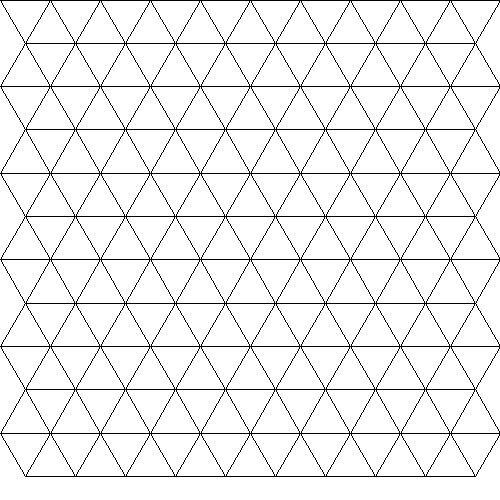

In [253]:
SCALE = 50.
SIZE = 500
im = Image.new('RGB', (SIZE, SIZE), WHITE)
draw = ImageDraw.Draw(im)

maketri()
#print(alltri)

#print("before:", allotr)
makeotr()
#print("after:", allotr)

for otr in allotr:
    #print(otr)
    sotr = otr[0][0]*SCALE, otr[0][1]*SCALE, otr[1][0]*SCALE, otr[1][1]*SCALE
    draw.line(sotr, fill=BLACK, width=1)
    
#im.show()
im.save('pil-cp06.jpg', quality=95)
im

---
***Правильные шестиугольники (соты)***

In [50]:
# init all
from PIL import Image, ImageDraw
from math import sin, cos, pi
import copy

# picture size inpixels
SIZE = 500

# colors
WHITE = 255, 255, 255
BLACK = 0, 0, 0

# math setup
GRAD = pi / 180.  # 1 degree in radians
RDIG = 3    # round to rdig digits after decimal point
LIM = 10.   # size of picture in relative values
LMIN = -1.5 # exclude hexes with left or upper side less than LMIN
LMAX = 11.5 # exclude hexes with right or lower side greater than LMAX


In [38]:
# start with 0, 0
ax = ay = 0.
allhex = set()
allsides = set()

In [49]:
def makehex(p):
    """ make hex
    calculate vertices, sides
    """
    global allsides
    ox, oy = p
    ax = round(ox + 1, RDIG)
    ay = oy
    bx = round(ox + sin(60. * GRAD), RDIG)
    by = round(oy + cos(60. * GRAD), RDIG)
    cx = round(ox - sin(60. * GRAD), RDIG)
    cy = by
    dx = round(ox - 1, RDIG)
    dy = oy
    ex = cx
    ey = round(oy - cos(60. * GRAD), RDIG)
    fx = bx
    fy = ey
    sides =  [[(ax, ay), (bx, by)], 
             [(bx, by), (cx, cy)], 
             [(cx, cy), (dx, dy)],
             [(dx, dy), (ex, ey)],
             [(ex, ey), (fx, fy)],
             [(fx, fy), (ax, ay)]]
    sides = [sorted(s) for s in sides]
    for side in sides:
        allsides |= {tuple(side)}
    hexa = (ox, oy), (ax, ay), (bx, by), (cx, cy), (dx, dy), (ex, ey), (fx, fy)
    return hexa

In [40]:
def makearound(p):
    """ make 6 hexes around the given one
    exclude those out of LIMits
    """
    ...

In [41]:
h0 = makehex((ax, ay))
print(f"{h0=}")
print(f"{allsides=}")

h0=((0.0, 0.0), (1.0, 0.0), (0.866, 0.5), (-0.866, 0.5), (-1.0, 0.0), (-0.866, -0.5), (0.866, -0.5))
allsides={((-0.866, -0.5), (0.866, -0.5)), ((-1.0, 0.0), (-0.866, 0.5)), ((0.866, -0.5), (1.0, 0.0)), ((0.866, 0.5), (1.0, 0.0)), ((-0.866, 0.5), (0.866, 0.5)), ((-1.0, 0.0), (-0.866, -0.5))}


In [42]:
#
...

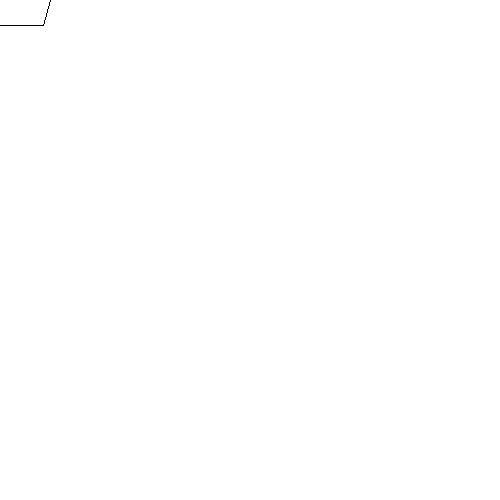

In [46]:
# run it all
SCALE = 50.
SIZE = 500
im = Image.new('RGB', (SIZE, SIZE), WHITE)
draw = ImageDraw.Draw(im)

for otr in allsides:
    #print(otr)
    sotr = otr[0][0]*SCALE, otr[0][1]*SCALE, otr[1][0]*SCALE, otr[1][1]*SCALE
    draw.line(sotr, fill=BLACK, width=1)
    
#im.show()
im.save('pil-cp07.jpg', quality=95)
im